## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

In [1]:
import math
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import os 
import scipy
from itertools import combinations_with_replacement
from sklearn.datasets import load_boston
import seaborn as sns
from scipy import stats
import statistics
import warnings
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")
sns.set_context("paper",font_scale=1.4)
plt.rcParams['figure.figsize'] = (10.0,6.0) # set default size of plots
plt.style.use('seaborn-deep')
plt.rcParams['font.family'] = 'serif'

### Question 1 - Data exploration and visialization - practical

Load Boston dataset from sklearn.
Explore the data. follow th instructions below and make sure to support your answers with proper outputs and plots.
When plotting, pay close attention to the range of the axis, and include axis labels and a title for the figure.

1. describe the dataset. How many samples does it contain? How many features? What isis the data type for each variable?
2. Produce a histogram and a boxplot of the nitric oxides concentration. describe the distribution.
3. Produce a correlation matrix of all the features. Are there any correlated features? Can you identify one feature with unusual behaviour?
4. Select the 2 pairs of features with the highest correlation (positive or negative) and plot 2 scatter plots with marginal histograms (JointPlot). 
5. Produce a cumulative histogram of the age variable and add two horizontal lines on the first and third quartile (on the cumulative count)
6. Identify and report 2 “interesting” trends in the data. No need to provide statistical confidence at this point. 

In [2]:
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

#### <font color='green'>Decribing the data set</font>


In [3]:
#to DF
bos_df = pd.DataFrame(boston.data)
bos_df.columns = boston.feature_names
#adding the targer to DF
bos_df['Price'] = boston.target 
print(bos_df.shape)
bos_df.info()

(506, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [4]:
bos_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
bos_df.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
Price      229
dtype: int64

#### <font color='green'>Answer Q-1.1</font>
* Thre are 506 smaples
* There are 13 features
* The target is the Median Value (attribute 14) . in our df the attribute name is Price 
* There are not null values
* Variables have a different scale (as we can at the describe teble)
* All features are formaly numeric (float type) , but the CHAS feature is actually binary (which means it can be converted to "yes" or "no")


### Question 1.2

count    506.000000
mean       0.554695
std        0.115878
min        0.385000
25%        0.449000
50%        0.538000
75%        0.624000
max        0.871000
Name: NOX, dtype: float64

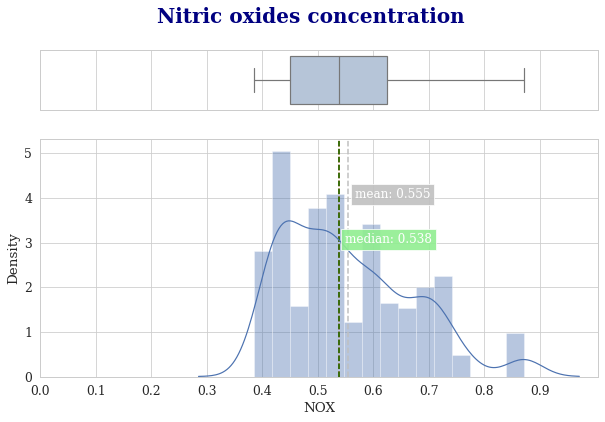

In [6]:
#ploting box and hist
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.20, .80)});
f.suptitle("Nitric oxides concentration", size=20, color='navy',weight='bold');
sns.boxplot(bos_df["NOX"],ax=ax_box,color='lightsteelblue');
ax_hist.axvline(bos_df["NOX"].mean(), color='silver', linestyle='--', linewidth=1.5)
ax_hist.axvline(statistics.mode(bos_df["NOX"]), color='red', linestyle='--', linewidth=1.5)

ax_hist.axvline(np.median(bos_df["NOX"]), color='green', linestyle='--', linewidth=1.5)

sns.distplot(bos_df["NOX"], ax=ax_hist ,bins=15);
ax_box.set(xlabel='');
ax_hist.set_xticks(np.arange(0, 1, step=0.1))
ax_box.set_xticks(np.arange(0, 1, step=0.1))

#ploting mean and median lines
min_ylim, max_ylim = ax_hist.get_ylim()
nmean=np.round(bos_df["NOX"].mean(),3)
nmedian=np.round(np.median(bos_df["NOX"]),5)

ax_hist.text(nmean*1.02, 4,f'mean: {nmean}' ,color='white',size=12, bbox=dict(facecolor='silver', alpha=0.9))
ax_hist.text(nmedian*1.02, 3,f'median: {nmedian}' ,color='white',size=12, bbox=dict(facecolor='lightgreen', alpha=0.9))

bos_df["NOX"].describe()

In [7]:
print(scipy.stats.mstats.normaltest(np.log(bos_df["NOX"]), axis=0).pvalue<0.01)  

True


#### <font color='green'>Answer Q-1.2</font>
#### Distribution description:  
* The distribution is very close to log normal:
* As we can see above the disrubtion isn't symetric, there is a right tail 
* The mean is grater then the median


### Question 1.3

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000,-0.200,0.407,-0.056,0.421,-0.219,0.353,-0.380,0.626,0.583,0.290,-0.385,0.456,-0.388
ZN,-0.200,1.000,-0.534,-0.043,-0.517,0.312,-0.570,0.664,-0.312,-0.315,-0.392,0.176,-0.413,0.360
INDUS,0.407,-0.534,1.000,0.063,0.764,-0.392,0.645,-0.708,0.595,0.721,0.383,-0.357,0.604,-0.484
CHAS,-0.056,-0.043,0.063,1.000,0.091,0.091,0.087,-0.099,-0.007,-0.036,-0.122,0.049,-0.054,0.175
NOX,0.421,-0.517,0.764,0.091,1.000,-0.302,0.731,-0.769,0.611,0.668,0.189,-0.380,0.591,-0.427
RM,-0.219,0.312,-0.392,0.091,-0.302,1.000,-0.240,0.205,-0.210,-0.292,-0.356,0.128,-0.614,0.695
AGE,0.353,-0.570,0.645,0.087,0.731,-0.240,1.000,-0.748,0.456,0.506,0.262,-0.274,0.602,-0.377
DIS,-0.380,0.664,-0.708,-0.099,-0.769,0.205,-0.748,1.000,-0.495,-0.534,-0.232,0.292,-0.497,0.250
RAD,0.626,-0.312,0.595,-0.007,0.611,-0.210,0.456,-0.495,1.000,0.910,0.465,-0.444,0.489,-0.382
TAX,0.583,-0.315,0.721,-0.036,0.668,-0.292,0.506,-0.534,0.910,1.000,0.461,-0.442,0.544,-0.469


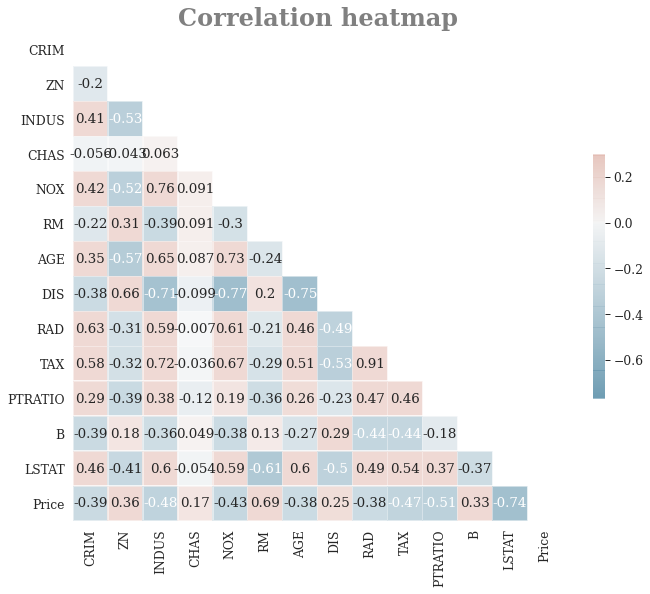

In [8]:
#we chexced correltion also with target(price)
corr = bos_df.corr();
corr=corr.round(3)
mask = np.triu(np.ones_like(corr, dtype=bool));
f, ax = plt.subplots(figsize=(11, 9));
cmap = sns.diverging_palette(230, 20, as_cmap=True);
sns.heatmap(corr, mask=mask, cmap=cmap,alpha=0.5, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});
ax.set_title('Correlation heatmap', size=24, color='gray',weight='bold')
corr

In [9]:
abs(corr).mean().sort_values()

CHAS       0.140929
B          0.343071
RM         0.361143
PTRATIO    0.372214
CRIM       0.411714
ZN         0.414857
Price      0.470429
AGE        0.489357
DIS        0.490929
RAD        0.500143
LSTAT      0.524429
NOX        0.532929
TAX        0.534357
INDUS      0.546929
dtype: float64

#### <font color='green'>Answer Q-1.3</font>
As we can see above, the CHAS Features has unusual behaviour than the others features has the lowest correlations with others features (its mean corr is 0.14 while the other features mean corr are bigger then 0.34)


### Question 1.4

In [10]:
max_=abs(corr[corr<1])
max_=max_.max().sort_values(ascending= False).head(4)
max_

TAX    0.910
RAD    0.910
DIS    0.769
NOX    0.769
dtype: float64

Text(100, 0.7, 'NOX- nitric oxides concentration (parts per 10 million)')

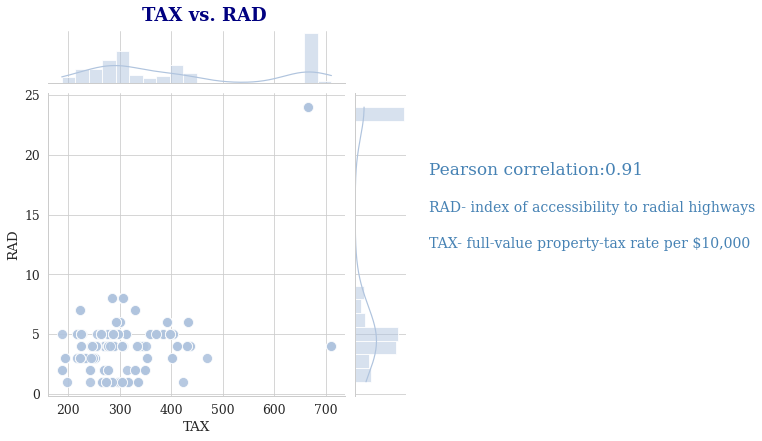

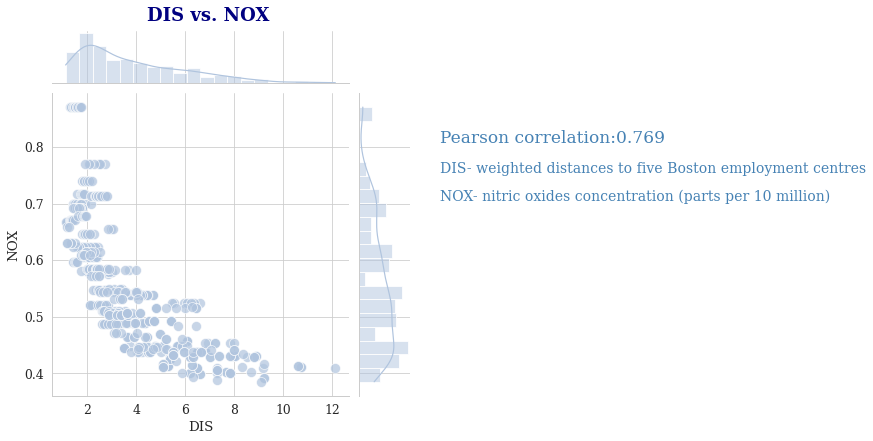

In [11]:
p = sns.jointplot(data=bos_df, x="TAX", y="RAD",s=100,alpha=0.9,color='lightsteelblue',marginal_kws=dict(bins=20, kde=True))
plt.suptitle('TAX vs. RAD',va="bottom", fontsize = 18, color='navy', weight='bold')
plt.text(200,18,f'Pearson correlation:{max_[0]}',va="bottom", fontsize = 17, color='steelblue')
plt.text(200,15,'RAD- index of accessibility to radial highways',va="bottom", fontsize = 14, color='steelblue')
plt.text(200,12 ,'TAX- full-value property-tax rate per $10,000',va="bottom", fontsize = 14, color='steelblue')


p = sns.jointplot(data=bos_df, x="DIS", y="NOX",s=100,alpha=0.7,color='lightsteelblue',marginal_kws=dict(bins=20, kde=True))
plt.suptitle('DIS vs. NOX',va="bottom", fontsize = 18, color='navy', weight='bold')
plt.text(100,0.8,f'Pearson correlation:{max_[2]}',va="bottom", fontsize = 17, color='steelblue')
plt.text(100,0.75,'DIS- weighted distances to five Boston employment centres',va="bottom", fontsize = 14, color='steelblue')
plt.text(100,0.7 ,'NOX- nitric oxides concentration (parts per 10 million)',va="bottom", fontsize = 14, color='steelblue')

### Question 1.5

Text(5, 0.67, ' third quartile')

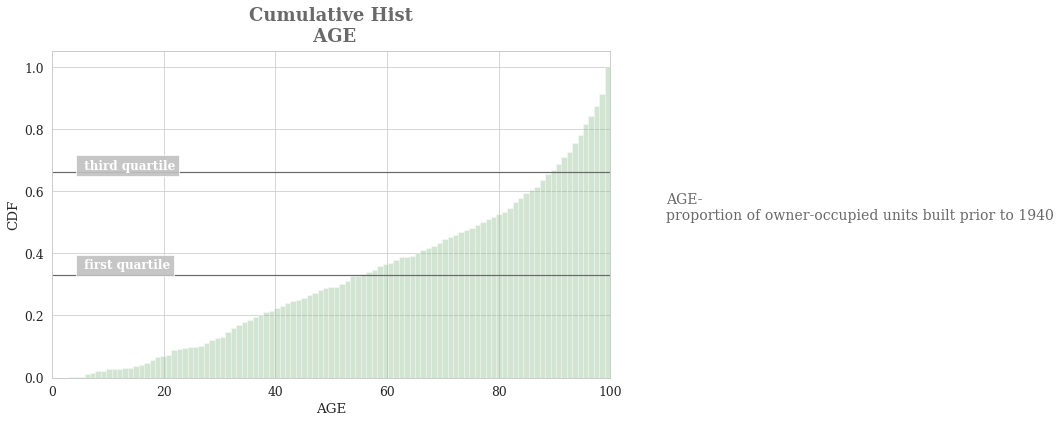

In [12]:
sns.distplot(bos_df.AGE.values, bins=100,hist_kws={'cumulative': True}, kde_kws={'lw': 0},color='darkseagreen')
plt.ylabel('CDF') ;plt.xlabel('AGE') 
plt.axhline(0.33, color='dimgray') 
plt.axhline(0.66, color='dimgray')
plt.title('Cumulative Hist\n AGE',va="bottom", fontsize = 18, color='dimgray', weight='bold');
plt.xlim(0, bos_df.AGE.max());
plt.text(110,0.5 ,'AGE-\nproportion of owner-occupied units built prior to 1940',va="bottom", fontsize = 14, color='dimgray');
plt.text(5, 0.35,' first quartile',color='white',size=12,weight='bold', bbox=dict(facecolor='silver', alpha=0.9))
plt.text(5, 0.67,' third quartile',color='white',size=12, weight='bold',bbox=dict(facecolor='silver', alpha=0.9))

### Question 1.6

Text(0.5, 1.0, 'Pair plot Boston')

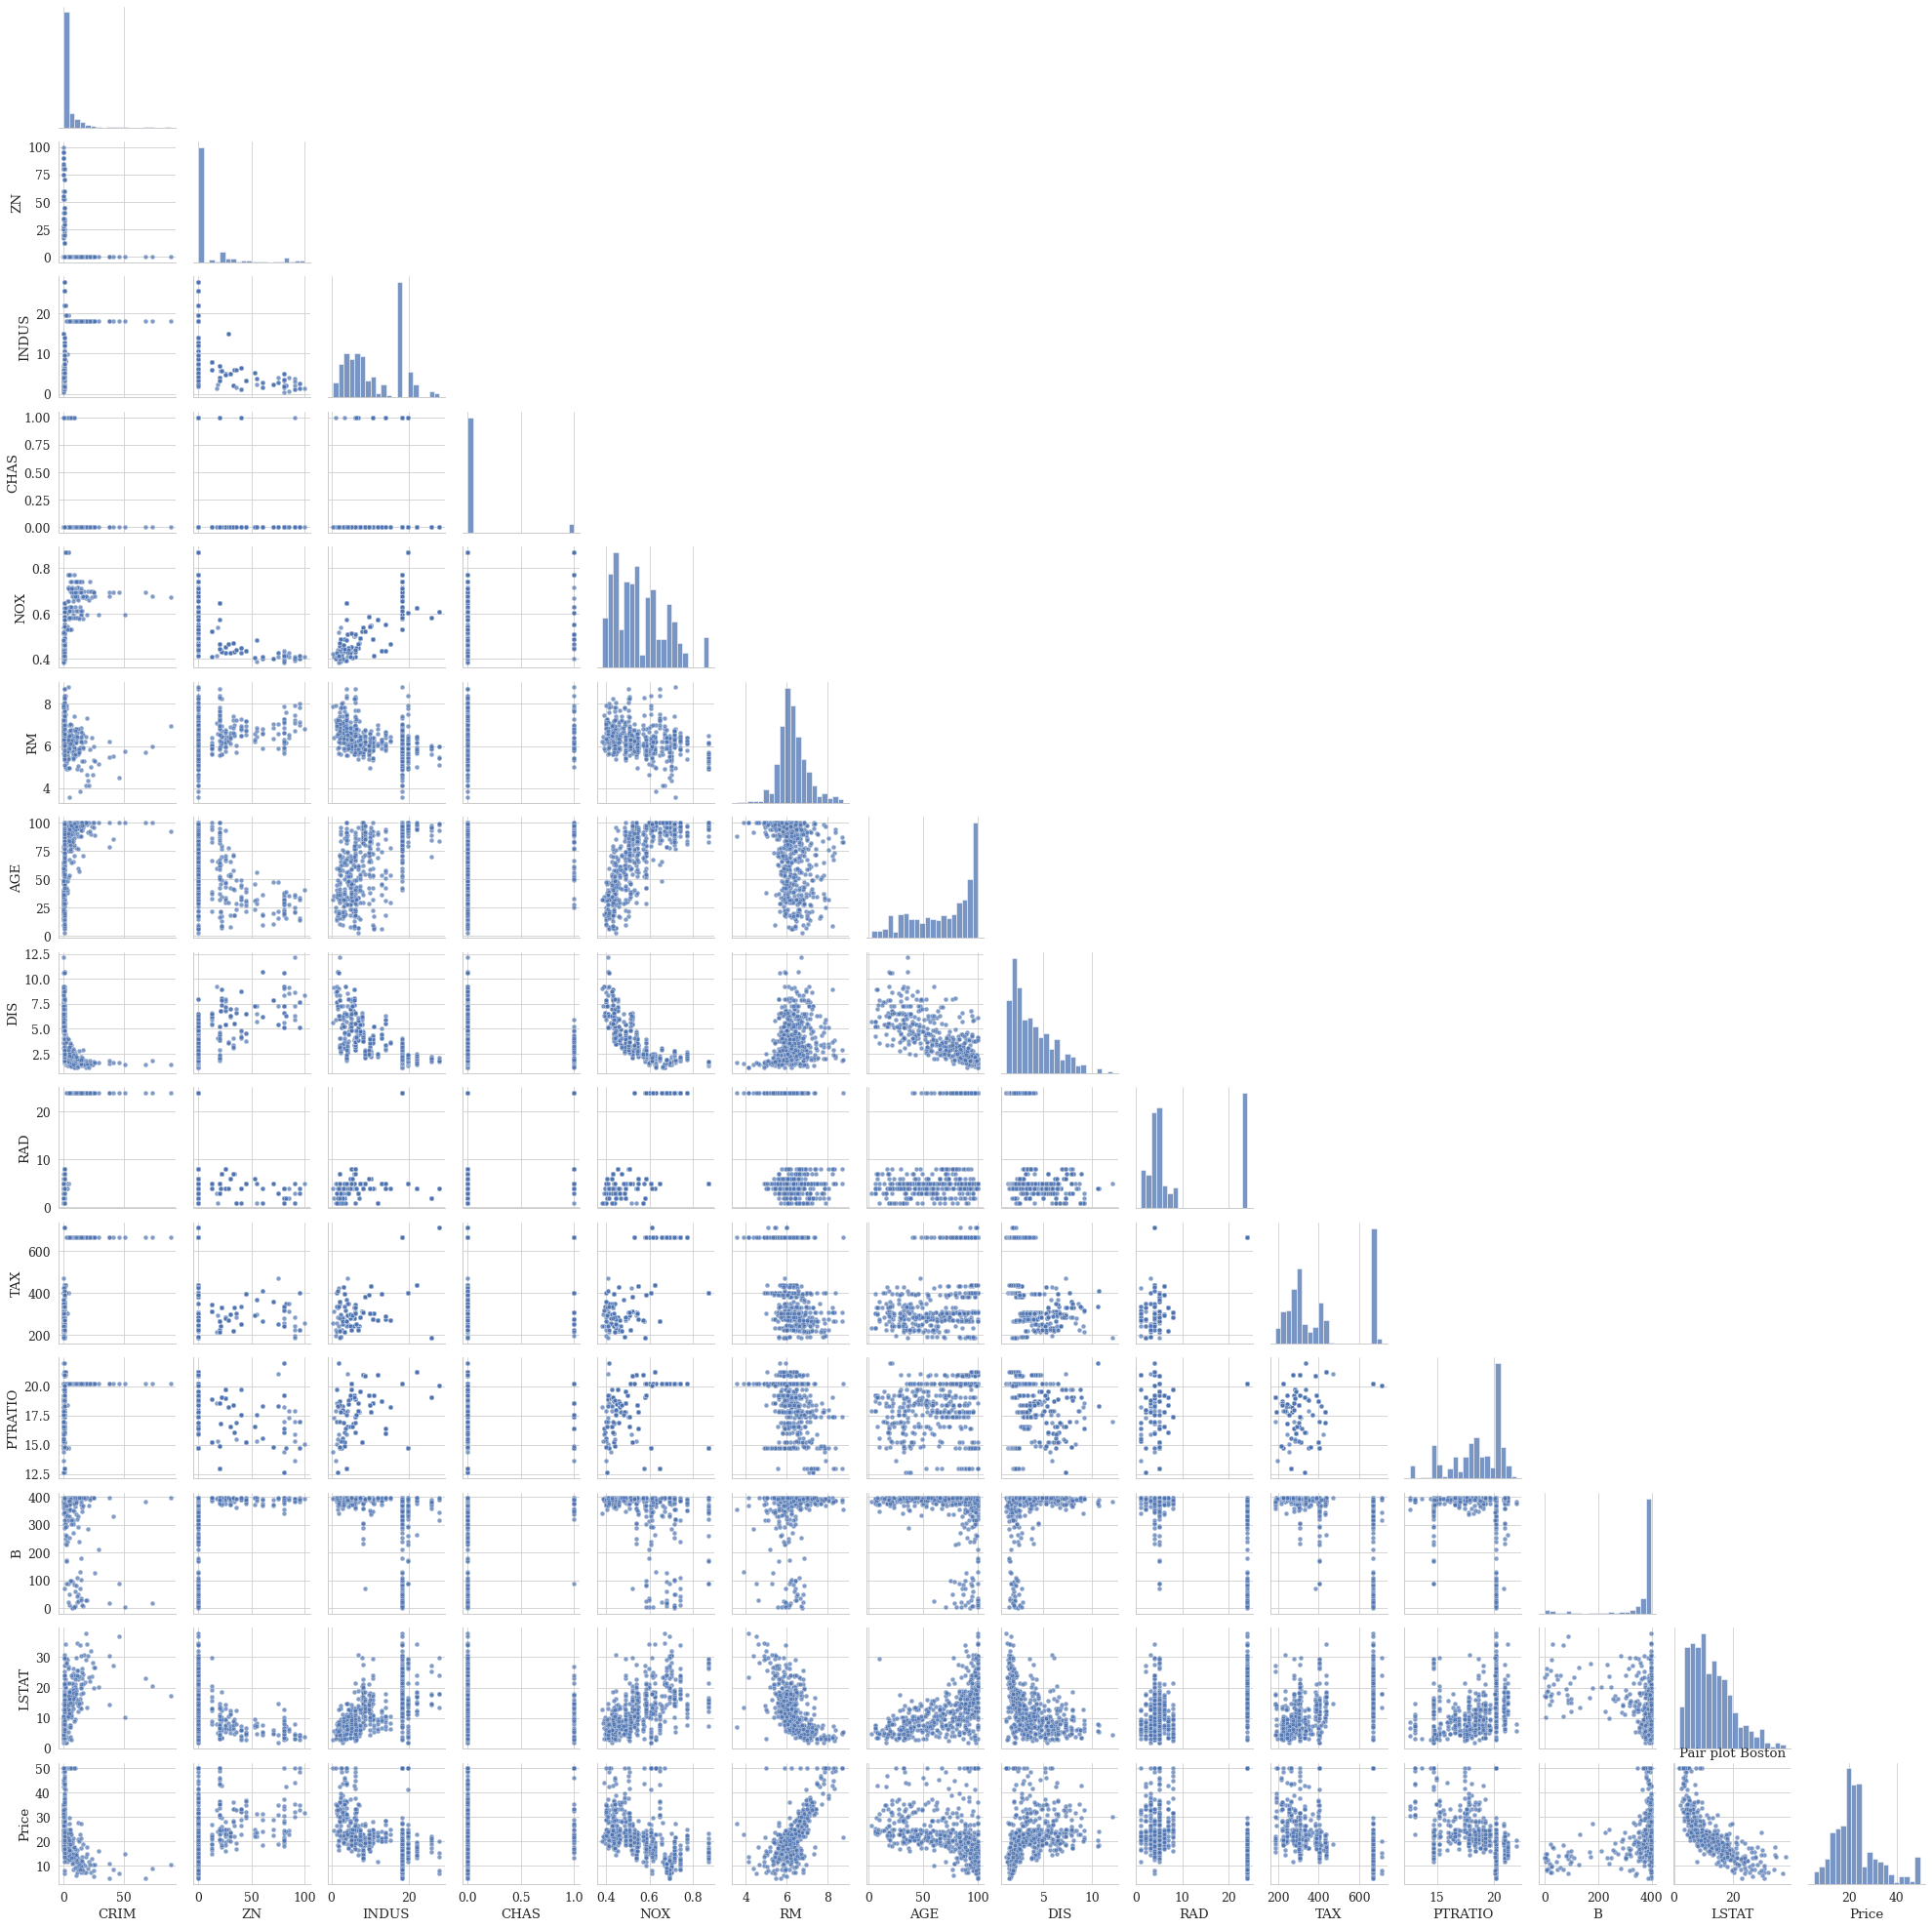

In [13]:
#first plotting all the distrubtions and scatrer plots to find "trends"
sns.pairplot(bos_df,corner=True, height=2,
plot_kws={'alpha': 0.7},
diag_kws={'bins': 20})
plt.title('Pair plot Boston')

#### First trend: we found that the connection between price and LSTAT is price~log(LSTAT)

Text(0.5, 1.0, 'scatter plot LSTAT vs. Price')

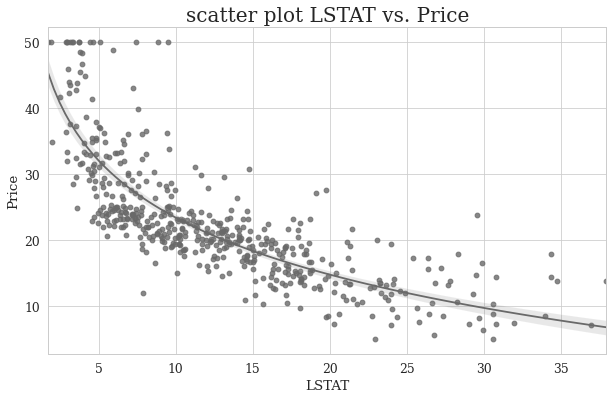

In [14]:
high=corr.Price.sort_values()
high_Corr=bos_df[['LSTAT','RM','PTRATIO','Price']];
sns.regplot(high_Corr['LSTAT'],high_Corr['Price'],logx=True,color='dimgray')
plt.title("scatter plot LSTAT vs. Price",size=20)

#### Second trend: we found that the CHAS featue is  imbalanced
less tract bounds river then not.

Text(0.5, 1.0, 'Charles River dummy variable')

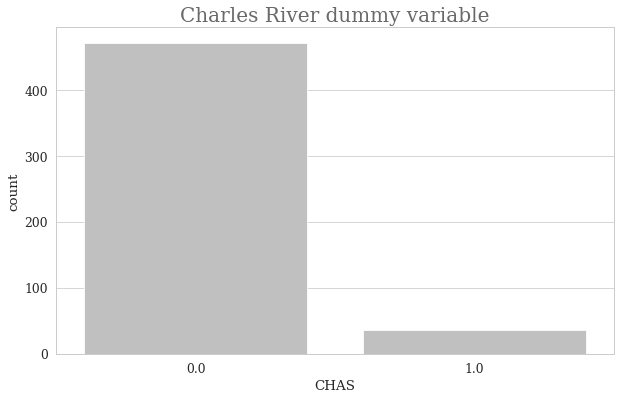

In [15]:
sns.countplot(bos_df["CHAS"],color='silver');
plt.title('Charles River dummy variable',SIZE=20,color='dimgray')

#### Third trend: DIS NOX and LSTAT distributions are similar to log normal
Charles River dummy variable ( 1 if tract bounds river; 0 otherwise)

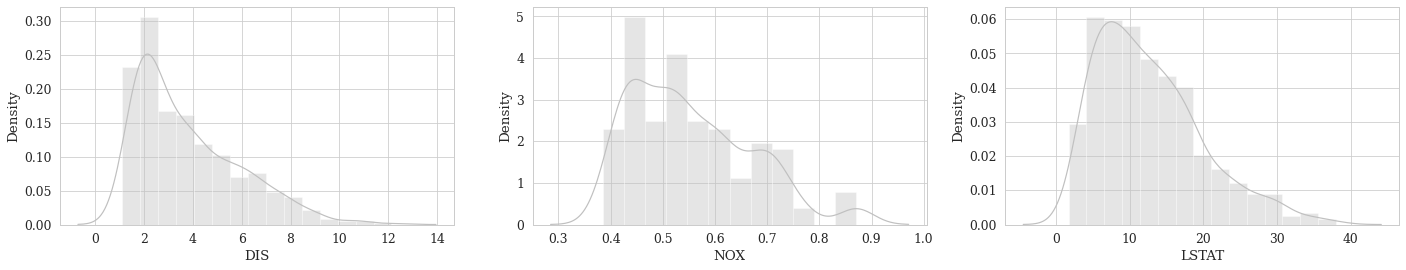

In [16]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(24,4))
sns.distplot(bos_df['DIS'],ax=ax1,color='silver')
sns.distplot(bos_df['NOX'],ax=ax2,color='silver')
sns.distplot(bos_df['LSTAT'],ax=ax3,color='silver')


####  Price and RM distributions are similar to normal

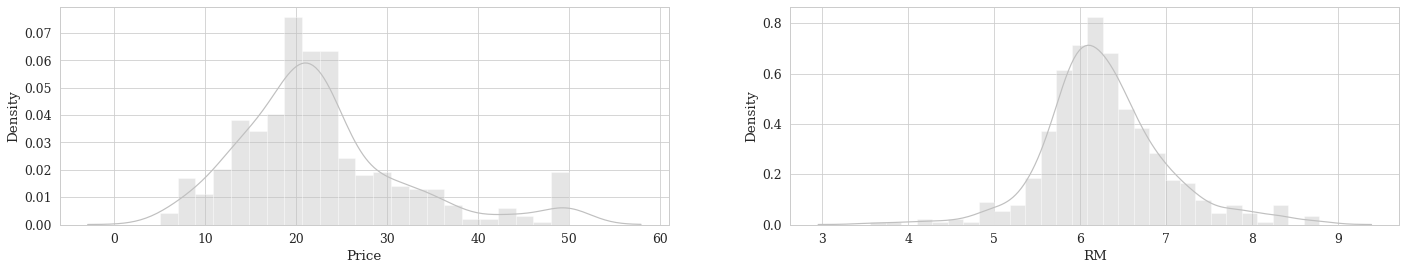

In [17]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(24,4))
sns.distplot(bos_df['Price'],ax=ax1,color='silver')
sns.distplot(bos_df['RM'],ax=ax2,color='silver')

### Question 2 - Independence and conditional independence

#### 2.A
Can we define a three dimensional multivariate gaussian that is pairwise-independent but not collectivley independent?
If your anser is yes, provide an example.
If your answer is no, provide a proof.

#### Answer:
Generally it is true that pairwise independent doesnt imply collectivley independent, but in case of multivariate gaussian it does imply. that means, that we can't provide example for the state above, so we are going to proof that the state is  invalid.
##### <font color='red'>The proof:</font>

1) If $X=x_1,x_2...x_n$ are pairwise independent, then  $ Cov(xi,xj)=0 $ for all  $j≠i$

2) Which means that the coverience matrix is:  $Σ =\begin{bmatrix} 
var_{11} & 0 & 0 \\ 
\ 0  & var_{22} & 0\\ 
\ 0& 0 & var_{33} \\ 
\end{bmatrix} \LongrightarrowΣ=\prod_{i=1}\sigma_i^2 \LongrightarrowΣ^{-1}=\prod_{i=1}\frac{1}{\sigma_i^2}$

3) If $ X \sim N( \mu , \sigma)$  $\Longrightarrow$

4) $p(X) = \frac{1}{{(2\pi)}^{d/2}|\Sigma_k|^{1/2}}e^{-\frac{1}{2}( X_i - \mu_i)^T \Sigma_k^{-1} (X_i - \mu_i)}$  ( multivariate gaussiann distrubtion formula)

5) and $p(x_i)=\prod_{i=1}\frac{1}{{(2\pi)}^{d/2}\sigma_i^2}e^{-\frac{1}{2\sigma_i^2} (X_i - \mu_i)^2}$ (gaussian distrubtion formula)

6) from 2+4$\Longrightarrow p(X) = \prod_{i=1}\frac{1}{{(2\pi)}^{d/2}\sigma_i^2}e^{-\frac{1}{2\sigma_i^2} (X_i - \mu_i)^2}$ wo got multiplication of normal distrubtions

5)Therefore we get $p(x_1 \cap x_2 \cap x_n)= p(x_1)*p(x_2)*p(x_n)$ ( we got the independence formula)
##### <font color='red'>Q.E.D</font>

#### 2.B
Let $\ X, Y \ $ and $Z$  be discrete random variables with $\ n, m \ $ and $k$ possible outcomes respectivley.

How many parameters define the joint distribution of $\ X, Y \ $ and $Z$?

#### Answer:
* We don't know the correlation status between x,y,z. which means we cant assume independent and can't use the formula: $p(X \cap Y \cap Z)= p(X)*p(Y)*p(Z)$ 

* Therefore we have to know all the possible values in the joint distribution  which is 
$ n*m*k $ values.
if we want the minimal parameters we can decrease one because the sum of all $p(x_i\cap y_i \cap z_i)$ is 1

* Eventually we need:
<font color='red'>$ n*m*k -1$:</font>parameters

#### 2.C
For the same random variables from the previous section, how many parameters define the joint distribution of $\ X, Y \ $ and $Z$ if we now know that they are independent?

#### Answer:
* We know that x,y,z are independent so we can use formula:  𝑝(𝑋∩𝑌∩𝑍)=𝑝(𝑋)∗𝑝(𝑌)∗𝑝(𝑍) 
* All we have to know is the probabilities distribution of each variable and then we could build the joint one therefore $m+m+k$ 
* If we are looking for the minimal parameters, we we can get all the joint values even with $ n-1+m-1+k-1= n+m+k-3 $,
Because the sum of every variable distribution is 1 , so $\Sigma_1^n x_1,x_2..x_n =1 $ and $\Sigma_1^m y_1,y_2..y_m =1 $ and $\Sigma_1^k z_1,z_2..z_n =1 $

* Eventually we need:
<font color='red'> $ n+m+k-3$ :</font>parameters

#### 2.D
For the same random variables from the previous section, how many parameters define the joint distribution of $\ X, Y \ $ and $Z$ if we now know that $X$ and $Y$ are conditionaly independent given $Z$?

#### Answer:

* This section is a combination of the two previous.
* $Y$ and $X$ are independent under Z therefore we will need $(n+m-2)$ parameters for them.
* In addition, we need to multiply them with the $Z$ distribution prob and to add all $Z$ prob (1-all prob)
* Eventually we need:
<font color='red'> $  k-1 +k(n+m-2)$ </font>parameters
* there is example with minimal paremters at next section


#### 2.E
For the random variables from the previous section, let $n=m=2$ and $k=2$. Give and example for a joint distribution of $\ X, Y \ $ and $Z$ where $X$ and $Y$ are conditionaly independent given $Z$?

* The minimal paremeters we need are 5 (as we saw at the privous section, we can use the Complement prob for the others.):

$ p(x,y|z) =\begin{cases} P(z=0)=0.3\\P(x=0|z=0)=0.5 \\ P(x=1|z=1)=0.5\\P(y=0|z=0)=0.5 \\ P(y=1|z=1)=0.5 \end{cases} $




* We can see from the joint disrubtion $ x$ and $y$ are independent only by given Z




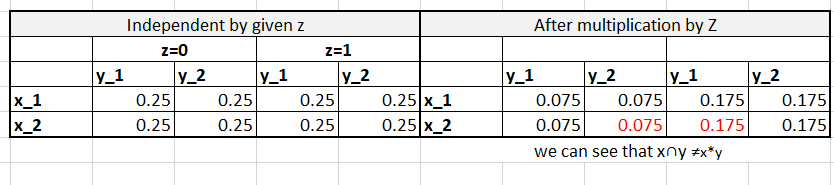

### Question 3 - Gaussian mixtures – parameter estimation and generation 

Consider the data provided in GMD_2021.csv
Assume that the data comes from a Gaussian mixture distribution (GMD) with $k=3\ \ $. Furthermore, assume that $\mu_{1}=4, \mu_{2}=9, \sigma_{1}=\sigma_{2}=0.5, \sigma_3=1.5$ and $w_2=0.25$.

Read the data and answer the following questions.

In [18]:
# reading the data
q3data = pd.read_csv('GMD_2021.csv', index_col=0, header = None, names=['Index', 'Values']) 
q3data

,Values
Index,
0,3.575253
1,4.105491
2,3.903642
3,4.472249
4,4.297265
...,...
795,16.596823
796,16.314496
797,14.690099


Text(0.5, 1.0, 'GMD')

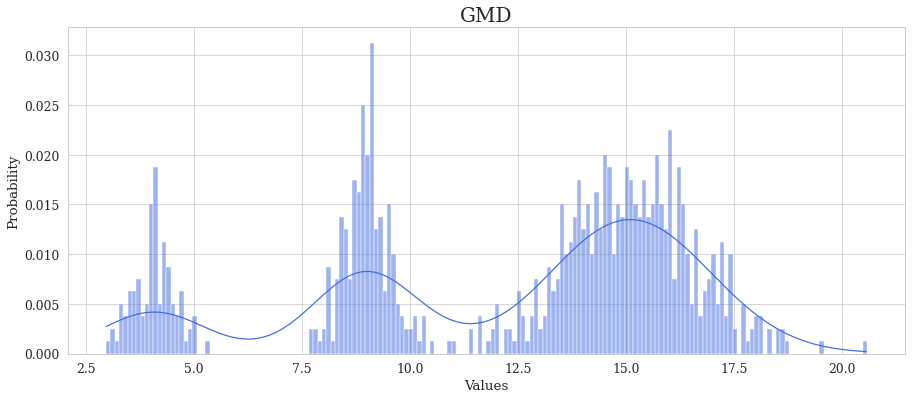

In [19]:
plt.rcParams['figure.figsize'] = (15.0,6.0) # set default size of plots
sns.histplot(data=q3data, x="Values", kde=True, binwidth=0.1, stat="probability",color="royalblue");
plt.title('GMD',size=20)

#### 3.A
Provide an estimate for the other parameters of the distribution in two different ways.

#### <font color='green'>3A -  Answer - first way - using EM</font>
In the recitation Leon said the the given parameters are correct, and we need to keep their values, no matter how many iterations we have. In addition, we need to estimate the other parametes in two different ways - one with EM and in another way, and implement EM on our own. 

In [20]:
def expectation (N, mu1, mu2, mu3, sigma1, sigma2, sigma3, w1, w2, w3):
    # calculating probabilities 
    q3data['Gaussian 1 Probability'] = w1 * scipy.stats.norm(mu1, sigma1).pdf(q3data['Values']) 
    q3data['Gaussian 2 Probability'] = w2 * scipy.stats.norm(mu2, sigma2).pdf(q3data['Values']) 
    q3data['Gaussian 3 Probability'] = w3 * scipy.stats.norm(mu3, sigma3).pdf(q3data['Values']) 
    
    q3data['Gaussian 1 responsibility'] = q3data['Gaussian 1 Probability'] / (q3data['Gaussian 1 Probability'] + q3data['Gaussian 2 Probability'] + q3data['Gaussian 3 Probability'])
    q3data['Gaussian 2 responsibility'] = q3data['Gaussian 2 Probability'] / (q3data['Gaussian 1 Probability'] + q3data['Gaussian 2 Probability'] + q3data['Gaussian 3 Probability'])
    q3data['Gaussian 3 responsibility'] = q3data['Gaussian 3 Probability'] / (q3data['Gaussian 1 Probability'] + q3data['Gaussian 2 Probability'] + q3data['Gaussian 3 Probability'])
    
    q3data['Check 1'] = (q3data['Gaussian 1 responsibility'] + q3data['Gaussian 2 responsibility'] + q3data['Gaussian 3 responsibility'])
    


def maximization (N, mu1, mu2, mu3, sigma1, sigma2, sigma3, w1, w2, w3):
    # updating w's, no need to recalculate w2 since is given:
    w1 = q3data['Gaussian 1 responsibility'].sum() /  N
    w3 = q3data['Gaussian 3 responsibility'].sum() /  N
    w1 = w1[0]
    w3 = w3[0]
    
    
    # updating mu's - we need to update only mu3 since all others are given
    
    q3data['Gaussian 3 r*x'] = q3data['Gaussian 3 responsibility'] * q3data['Values']
    
    mu3 = 1 / (w3 * N) * q3data['Gaussian 3 r*x'].sum()
    mu3 = mu3[0]
    
    return mu3, w1, w3
   
    
    
    
# reading the data
q3data = pd.read_csv('GMD_2021.csv', index_col=0, header = None, names=['Index', 'Values']) 


# given parameters:

N = q3data.count()
mu1 = 4
mu2 = 9
sigma1 = 0.5
sigma2 = 0.5
sigma3 = 1.5
w2 = 0.25
k=3


# initial assumptions:

mu3 = 5
w1 = 0.5
w3 = 0.25
iterations = 4

old_mu3 = mu3
old_w1 = w1
old_w2 = w2

# step 1 - calculating r of each Gaussian
for i in range (iterations):
   
    expectation (N, mu1, mu2, mu3, sigma1, sigma2, sigma3, w1, w2, w3)  
    mu3, w1, w3 = maximization (N, mu1, mu2, mu3, sigma1, sigma2, sigma3, w1, w2, w3)
    
    print ("for iteration no. ", i)
    print ("values are:", "mu3 = ", mu3, ", w1 = ", w1, ", w3 = ", w3)
    
    epsilon_mu3 = old_mu3-mu3
    epsilon_w1 = old_w1-w1
    epsilon_w2 = old_w2-w2
    
    print ("epsilons are ", epsilon_mu3, ", ",epsilon_w1, ", " ,epsilon_w2 )
    print ("-------------")
    
    old_mu3 = mu3
    old_w1=w1
    old_w2=w2
    

print ("final values are:", "mu3 = ", mu3, ", w1 = ", w1, ", w3 = ", w3)

q3data
w1+w2+w3

for iteration no.  0
values are: mu3 =  14.647821470777822 , w1 =  0.10169772319326356 , w3 =  0.6533737133297787
epsilons are  -9.647821470777822 ,  0.39830227680673647 ,  0.0
-------------
for iteration no.  1
values are: mu3 =  15.087523652705679 , w1 =  0.1249999996257041 , w3 =  0.6269013469692906
epsilons are  -0.4397021819278564 ,  -0.02330227643244054 ,  0.0
-------------
for iteration no.  2
values are: mu3 =  15.100741922350071 , w1 =  0.12499999995602677 , w3 =  0.6252293751507243
epsilons are  -0.013218269644392322 ,  -3.303226719930663e-10 ,  0.0
-------------
for iteration no.  3
values are: mu3 =  15.10105177134861 , w1 =  0.12499999995862389 , w3 =  0.6251897235966627
epsilons are  -0.00030984899853869763 ,  -2.597116965930013e-12 ,  0.0
-------------
final values are: mu3 =  15.10105177134861 , w1 =  0.12499999995862389 , w3 =  0.6251897235966627


1.0001897235552866

#### <font color='green'>3A - second way - calculating using solving equations</font>

As we saw in the recitation, we have 3 equations with 3 variables that we can solve in order to get our parameters:

all weights are equal to 1 so:

(1)    $ w_1 +w_2+ w_3 = 1 $ 

as we saw in class - the sum of weighted expected values is equal to the mean of the entire data so:

(2)    $ w_1 * \mu_1 + w_2 * \mu_2 + w_3 * \mu_3 = data mean $ 

we also saw in class - the formula for the variance of the GMM is as follows:

$ \sigma_{GMM}^2 = \sum w_i E((X_i - \mu _i )^2)  +  \sum w_i (\mu _i - \mu)^2 $

and we can simplify it like this so the third equation will be:

(3) $ w_1*\sigma_1^2+w_2*\sigma_2^2 + w_3*\sigma_3^2+w_1*(\mu_1-data mean)^2 + w_2*(\mu_2-datamean)^2+w_3*(\mu_3-datamean)^2 = datavar $

so we have got 3 equations with 3 variables we can solve. We can do it using SciPy as follows:


In [21]:
datavar = q3data['Values'].var()
datamean = q3data['Values'].mean()

# initial assumptions:

mu3_guess = 5
w1_guess = 0.5
w3_guess = 0.25

def func(x): 
    
    datavar = q3data['Values'].var()
    datamean = q3data['Values'].mean()
    
    mu1 = 4
    mu2 = 9
    sigma1 = 0.5
    sigma2 = 0.5
    sigma3 = 1.5
    w2 = 0.25
    
    # we are looking for x[0] = w1, x[1]=w3, and x[2]=mu3
    
    return [x[0] + w2 + x[1] - 1, x[0] * mu1 + w2 * mu2 + x[1] * x[2] - datamean,  x[0] * (sigma1**2) + w2 * (sigma2**2) + x[1]*(sigma3**2) + x[0]*((mu1-datamean)**2) + w2 * ((mu2-datamean)**2) + x[1] * ((x[2]-datamean)**2)- datavar]

w1_alternative, w3_alternative, mu3_alternative = scipy.optimize.fsolve(func, [w1_guess,w3_guess,mu3_guess])

print ("mu3 alternative is" ,mu3_alternative, ", w1 alterntive is", w1_alternative, ", w3 alterntive is", w3_alternative)

mu3 alternative is 15.089446029962964 , w1 alterntive is 0.12338230752645826 , w3 alterntive is 0.6266176924735418


#### <font color='green'>3A answer - third way - calculating "by hand" </font>

we can look at the histogram of the data, and then choose the specific observations, and calculate the mean value only for them, as follows.

First we will display the histogram of the data:

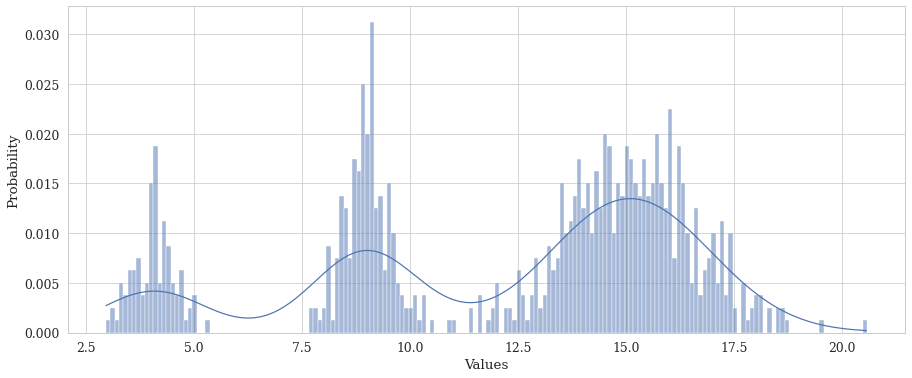

In [22]:
sns.histplot(data=q3data, x="Values", kde=True, binwidth=0.1, stat="probability")

we can see that the first gaussian starts at 0 until ~6, the second starts in ~6 until 11, and the third gaussian starts in ~11, and includes all values larger than 11. so we can take all these values and make the average of them, in order to estimate $ \mu_3 $, and we can count the number of observations of each gaussian to estimate the weights of gaussian 1 and gaussian 3:

In [23]:
mask1 = (q3data['Values'] > 0) & (q3data['Values'] < 6)

w1_alternative = q3data[mask1]['Values'].count() / N


mask3 = q3data['Values'] >= 11

mu3_alternative = q3data[mask3]['Values'].mean()
w3_alternative = q3data[mask3]['Values'].count() / N

print ("mu3 alternative is" ,mu3_alternative, ", w1 alterntive is", w1_alternative[0], ", w3 alterntive is", w3_alternative[0])

mu3 alternative is 15.12062335397427 , w1 alterntive is 0.125 , w3 alterntive is 0.6225


#### 3.B
Plot a graph of the pdf of the distribution you inferred. Select adequate limits for the axes for this plot and explain your decision.

(-0.4675804653224098, 24.89541666065543)

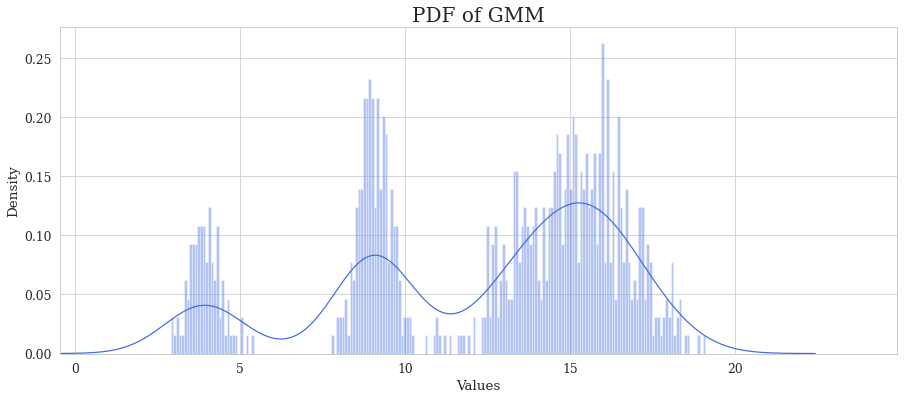

In [24]:
lenN = len(q3data)
lenN1, lenN2, lenN3 = int(lenN * w1), int(lenN * w2), int(lenN * w3)
normal1 = stats.norm.rvs(loc=mu1, scale=sigma1, size=lenN1)
normal2 = stats.norm.rvs(loc=mu2, scale=sigma2, size=lenN2)
normal3 = stats.norm.rvs(loc=mu3, scale=sigma3, size=lenN3)
GMM = np.concatenate((normal1, normal2, normal3))
std_= np.std(GMM);mean_ = np.mean(GMM)
plt.figure()
sns.distplot(GMM,color='royalblue',bins=200)
plt.title('PDF of GMM',size=20)
plt.xlabel("Values")
plt.xlim(mean_ - 3 * std_,mean_+ 3 * std_) # 0.997 = mean - 3sigma ≤ Y ≤ mean + 3sigma

#### 3.C
Describe two ways for generating data for a GMM random variable with:
* centers at  $\mu_1+3, \mu_2+5, mu_3+7$
* $\sigma_1=\sigma_2=\sigma_3=1$
* $w_1=w_2=w_3=0.33$

#### <font color='green'>3.C Answer - way #1 - using random function </font>

The first way is to generate 3 different Gaussians, with defined parameters and concatenate them.
In order to get equal weights, we can generate 3 gaussians, each with the same number of observations (so we would get $ w_1 = w_2 = w_3 = 0.33 $).

Concatenting them together will provide us with the GMM required.

#### <font color='green'>3.C Answer - way #2 - using inverse sampling </font>


As we saw in the recitation, we can use inverse sampling in order to create normal distribution out of uniform distribution. In this method we randomize 3 arrays containing uniformly distributed values, and then using the $ F^{-1} $ function of normal disribution, in order to convert them to standard normal RV's.
In order to change their expected values to the required ones, we need to just add the wanted expected value to each one of the observations we got. (for example for the first array, add ($\mu_1 +3$ to each one of the observations)

#### 3.D
Use one of the above approaches to generate 1000 points and plot a histogram of the result (decide on bins, axes etc)


Text(0.5, 1.0, 'GMM3 using random function')

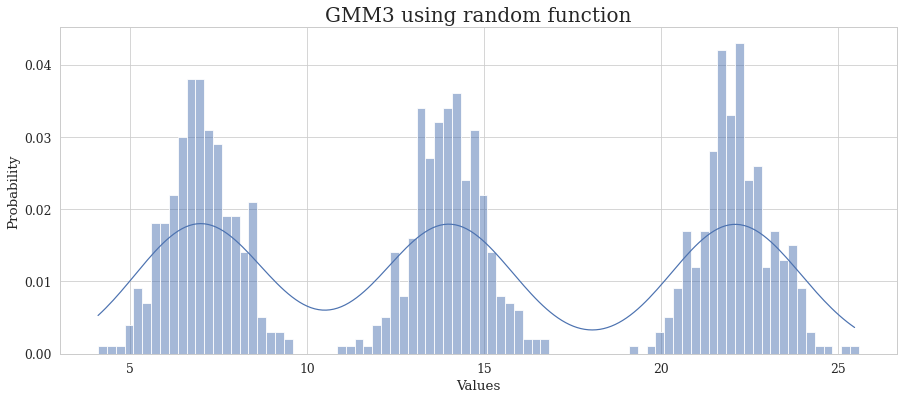

In [25]:
# using the first method

norm4 = np.random.normal(mu1 + 3, 1, 333)
norm5 = np.random.normal(mu2 + 5, 1, 333)
norm6 = np.random.normal(mu3 + 7, 1, 334)

GMM3 = np.concatenate ((norm4, norm5, norm6),  axis=None)

sns.histplot(data=GMM3, kde=True, binwidth=0.25, stat="probability")
plt.xlabel("Values")
plt.title('GMM3 using random function',size=20)

#### 3.E - BONUS
Use the other one to generate 1000 more points and draw two comparative histograms.


Text(0.5, 0, 'values')

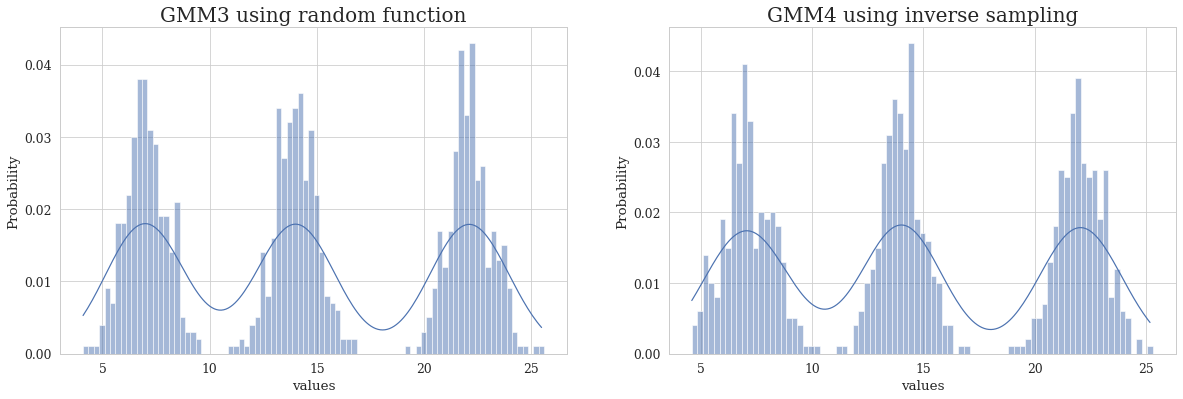

In [26]:
# using the second method

uniform4=np.random.rand(333)
uniform5=np.random.rand(333)
uniform6=np.random.rand(334)

GMM4A = scipy.stats.norm.ppf(uniform4,loc=0,scale=1)+(mu1+3)
GMM4B = scipy.stats.norm.ppf(uniform5,loc=0,scale=1)+(mu2+5)
GMM4C = scipy.stats.norm.ppf(uniform6,loc=0,scale=1)+(mu3+7)

GMM4 = np.concatenate ((GMM4A, GMM4B, GMM4C),  axis=None)


# comparing the results

fig, axes = plt.subplots(1,2, figsize=(20,6))

sns.histplot(data=GMM3, ax=axes[0] , kde=True, binwidth=0.25, stat="probability")
axes[0].set_title('GMM3 using random function',size=20)
axes[0].set_xlabel('values')
sns.histplot(data=GMM4 ,ax=axes[1], kde=True, binwidth=0.25, stat="probability")
axes[1].set_title('GMM4 using inverse sampling',size=20)
axes[1].set_xlabel('values')


### Question 4 - Normally distributed salaries

The annual salaries of employees in a large Randomistan company are approximateley normally distributed with a mean of 70,000 RCU and a standard deviation of 30,000 RCU.

#### 4.A
What percent of people earn less than 50,000 RCU?

#### <font color='green'>4.A Answer </font>
We know $\mu=70,000$ and $\sigma = 30,000$. 
We can use the cdf function for getting the answer:

In [27]:
# P(X<=50)

mu=70*10**3
sigma = 30*10**3

q4a = scipy.stats.norm(mu, sigma).cdf(50*10**3) 
print (q4a*100, "%")

25.24925375469229 %


#### 4.B
What percent of people earn between 45,000 RCU and 65,000 RCU?

#### <font color='green'>4.B Answer </font>
we are looking for $P(x\leq 65) - P(X \leq 45) $

In [28]:
# P(X<=65) - P(X<=45)

q4b = scipy.stats.norm(mu, sigma).cdf(65*10**3) - scipy.stats.norm(mu, sigma).cdf(45*10**3) 
print (q4b*100, "%")

23.148778642545327 %


#### 4.C
What percent of people earn more than 70,000 RCU?

#### <font color='green'>4.C Answer </font>
we are looking for $1 - P(X \leq 70) $

In [29]:
# 1 - P(X<=70)

q4c = 1 - scipy.stats.norm(mu, sigma).cdf(70*10**3) 
print (q4c*100, "%")

50.0 %


#### 4.D
The company has 1000 employees. How many employees in the company do you expect to earn more than 140,000 RCU?

In [30]:
# first we need to "standartize" 140,000 RCU 

required_salary = 140000
z = (required_salary - mu)/sigma

q4d1 = 1 - scipy.stats.norm().cdf(z)

# we'll now multiply by the number of employees in the company:
no_of_employees = 1000
q4d2 = q4d1 * no_of_employees
q4d2

9.815328628645315

#### 4.E
A survey is performed on employees of the company. The employees are split into 20 groups of 50 employees each.
What is the probability that more than 10 groups have an average salary between 50,000 RCU and 70,000 RCU?

#### <font color='green'>4.E Answer </font>

we can assume that each group of employees is distributed normally with $ \mu=70 $ and $ \sigma=30/20 $ .


this is because multiplying Variance by a constant changes it by itself square, so sigma will change by itself, for example -

$ Var(10X) = 10^2 * Var(X) $
$ sigma (10X) = sqrt (Var (10X)) = $

$ sqrt (10^2 * Var(X))= 10 * sqrt(Var(x)) = 10 * sigma (x) $

each one of the groups has a possibility that the average salary would be between 50 and 70
after calculating this probability then we can have a binomial test and test it

In [31]:
# first stage - calculate the probability that each one of the groups by its own has an average salary between 50 and 70
no_of_groups = 20
sigma4e = sigma / no_of_groups

q4e1 = scipy.stats.norm(mu, sigma4e).cdf(70*10**3) - scipy.stats.norm(mu, sigma4e).cdf(50*10**3) 
q4e1

# we will now use the result we got in order to compute the probability of receiving more than 10 successes
q4e2 = 1 - scipy.stats.binom.cdf (k = 10, n = 20 , p = q4e1)
print (q4e2*100, "%")

41.19014739990232 %


### Question 5 - Coupon collector

Let $T_{N}$ denote the waiting time for full single coupon collection with N different equiprobable coupon types

#### 5.A
Write code to compute the exact value of $E(T_{N})$

In [32]:
# n shall be the number of coupon types
# we saw in class that E(T) = n*ln(n), we can use that to check our solution


def tn_expected_value (n):
    sum_of_exi = 0

    for i in range (1, n+1):
        p = (n-i+1)/n
        sum_of_exi += 1/p

    return sum_of_exi

n = 100

sum_of_exi = tn_expected_value(n)

print ("The expected Value of T_N where n =" , n , "is" , sum_of_exi)
print ("sanity check is", (n) * np.log (n))  # np log = ln


The expected Value of T_N where n = 100 is 518.737751763962
sanity check is 460.51701859880916


#### 5.B
Write code to compute the exact value of $V(T_{N})$

### Answer:
We saw in class that:

\begin{align}
\ T_n = X_1 + X_2 + ... + X_n  \\\
\ Var (T_n) = Var (X_1 + X_2 + ... + X_n) \\\
\ = Var (X_1) + Var (X_2) + ... Cov(X_1, X_2) +... \\\
\end{align}

Since all X's are pairwise independent, then:
\begin{align}
\ Var (T_n) = Var (X_1) + Var (X_2) + ... + Var (X_n) \\\
\end{align}



In [33]:
def tn_variance (n):

    sum_of_var = 0

    for i in range (1, n+1):
        p = (n-i+1)/n
        var = (1-p) / (p ** 2)
        sum_of_var += var
    
    return sum_of_var
        
        
n = 100

sum_of_var = tn_variance(n)       

print ("The variance of T_N where n =" , n , "is" , sum_of_var)

The variance of T_N where n = 100 is 15831.101250084967


#### 5.C
Write code to exactly compute $P(T_{20}>40)$

### Answer: 
We need to calculate the probability of $P(T_{20} > 40)$, meaning that - what is the probability that, having 20 different coupons, the number of times it will take us to "watch" all 20 different coupons, will be more than 40 times.

Since each one of $X_i$ distributes geometrically, than we don't have an upper bound for the probability, so we will need to count up until 40, and sum all the probabilities, and use 1 minus the result.

We will use convolution for calculating the result of each sum (meaning $T_{20}=1, T_{20}=2$ and so on.)

In [34]:
def create_prob_array (i, n, wanted_trials):
    # input is i - the i'th x in the series
    # wanted_no_trials is the total number wanted number of trials we ar elooking for
    # output - an array that represents the probabilities for getting each number from 1 to wanted_no_trials
    
    xi_probabilities = [0]*(wanted_trials+1)

    for trial in range (wanted_trials+1):
        if trial == 0 :
            xi_probabilities[trial] = 0
        else:
            xi_probabilities[trial] = scipy.stats.geom.pmf (trial,(n-i+1)/n)
    
    return xi_probabilities




n = 20 # should be 20
wanted_trials = 40 # should be 40
sum_of_probs = 0 # will be used as the sum of all relevant probabilities in the end

# prob_array1 = create_prob_array (1, n, wanted_trials)
# prob2 = create_prob_array (2, n, wanted_trials)
# conv = np.convolve(prob_array1,prob2)
# print (prob_array1)
# print (prob2)
# print (conv)

prob_array = create_prob_array (1, n, wanted_trials)

if n == 2:
    # doing convolution for x1 and x2
    prob_array2 = create_prob_array (2, n, wanted_trials) 
    conv = np.convolve(prob_array, prob_array2)

else:
    # doing convolution for x1 and x2
    prob_array2 = create_prob_array (2, n, wanted_trials) 
    conv = np.convolve(prob_array, prob_array2)
    
    for i in range (3, n+1):
        # creating the probabilities array, starting with x3
        prob_array_i = create_prob_array (i, n, wanted_trials) 
        conv = np.convolve(conv, prob_array_i)

    
# print ('---------')
# print (conv)


for i in range (wanted_trials+1):
    sum_of_probs += conv[i]
    
1-sum_of_probs

0.9641122736925725

#### 5.D
Use Chebicheff to provide a bound for the probability from C and compare the results

### Answer

We saw in class that a different version of the chebicheff ineqaulity is -

$ P (\mu - b \sigma \leq Y \leq \mu + b\sigma ) \geq 1-1/{b^2} $

In order be able to use chebicheff we need to define b. In 5C we were asked about $ T_{20} > 40 $ so we somehow need to get chebicheff to be similar to that. meaning that the left side should be 40:

$ \mu - b \sigma = 40 $ 

we know $\mu$ and $\sigma$ so we can define b to be -

$ b = ({\mu - 40}) / {\sigma} $

if we put it in the equation we get that -

$ P (40 \leq Y \leq 2\mu -40 ) \geq 1-1/{({\mu - 40} / {\sigma})} ^ 2 $

we will calculate the result using the functions we built before:

In [35]:
n = 20
sum_of_var = tn_variance(n)  
print (sum_of_var)
sum_of_exi = tn_expected_value(n)
print (sum_of_exi)
wanted_trials = 40

1 - 1 / ((sum_of_exi - wanted_trials)/(sum_of_var ** 0.5)) **2  

566.5105044223355
71.95479314287363


0.4452006468290487

so we got that

$ P (40 \leq Y \leq 2\mu -40 ) \geq 0.445 $

since 

$ P (40 \leq Y \leq 2\mu -40 ) $ is in $ P (40 \leq Y ) $

then


$ P (40 \leq Y) \geq 0.445 $

We can see that the lower bound we found is significantly lower than the real probability we found on 5C, this is due to the fact that we are bounding the probability that we are looking for from the top by $ 2 \mu - 40 = 103.8 $, where in 5C we summed up all probabilities up to infinity. In addition, Chebicheff provides us with conservative estimation of the bound, and usually provides us with an estimation that is far from the "real" value we are looking for. We can try using more "strict" and "tight" inequalities. In addition, the inequality is general and is not specific for a certain distribution.